# Decision Tree Example
Decision tree is a supervised machine learning classifier. Supervised means we provised the true labels for samples. Decision tree is a white box, meaning it contains interpretable rules for classification.

## Create Data

,x,y,labels
0,-1.214649,-1.400439,0.0
1,0.616247,0.088779,0.0
2,-0.129316,0.607831,0.0
3,9.750181,8.370971,1.0
4,-0.773495,-0.514516,0.0
...,...,...,...
195,-1.244222,0.103253,0.0
196,8.826515,11.864074,1.0
197,-0.532754,0.489999,0.0
198,9.486620,11.086205,1.0


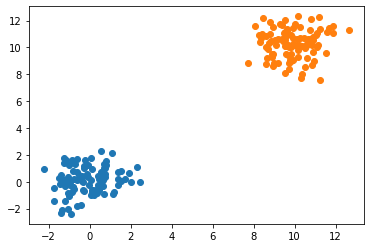

In [26]:
import numpy as np
import pandas as pd

# Create Class a with mean=0, stddev=1
a = np.random.normal(loc=0,scale=1,size=(100,2))
# Create Class a with mean=10, stddev=1
b = np.random.normal(loc=10,scale=1,size=(100,2))
# Add class a label
a = np.concatenate((a,np.zeros((100,1))),axis=1)
# Add class b label
b = np.concatenate((b,np.zeros((100,1))+1),axis=1)
# c is all data together
c = np.concatenate((a,b))
# shuffle data
np.random.shuffle(c)
# make into dataframe for people that give 75s on exams
df = pd.DataFrame(c,columns=['x','y','labels'])
display(df)
feature_cols = ['x','y']
X = df[feature_cols]
y = df['labels']
import matplotlib.pyplot as plt
plt.scatter(a[:,0],a[:,1])
plt.scatter(b[:,0],b[:,1])

In [17]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [19]:
# Visualize Decision Tree
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [53]:
# Get some super top secret data
data = pd.read_excel('data.xls',header=None)
# Check out the data, we want features and labels
display(data)
# Get labels (first column)
labels = data[0]
# Get features (rest of columns)
features = data.drop(labels=0,axis=1)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,W,21.200681,132.016597,47.219981,50.349746,46.487539,34.755742,33.597881,18.473604,26.539632,...,14.297243,8.434015,10.418177,13.375595,3.655923,8.491763,6.021052,11.601287,1.990410,0.000992
1,W,44.438714,114.290658,35.811684,84.975893,32.166913,60.329964,28.783897,25.943843,27.123248,...,19.585198,7.209554,13.998169,2.850417,8.521593,6.769334,6.700294,7.056262,0.976971,0.000992
2,W,92.351349,190.774909,111.854633,72.525277,64.196604,39.833236,45.635626,37.134132,38.319129,...,9.506759,4.778960,7.406606,6.807286,4.494433,5.545779,6.985621,7.752713,-0.079252,0.000992
3,W,79.749320,133.706286,28.995301,65.578626,59.113247,58.364334,37.902545,37.573984,41.861375,...,17.743692,3.734947,7.971205,5.579455,8.522862,7.306336,3.748083,3.396859,-0.612805,0.000992
4,W,40.712266,123.890152,57.350674,22.922443,17.652918,12.412688,27.629992,19.391655,17.613493,...,9.007097,5.299328,6.828046,6.254052,6.330257,6.471704,4.742784,14.300144,-0.381526,0.000992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,W,166.222038,130.706095,62.253905,61.525055,21.729124,68.880371,151.564664,75.735208,200.108885,...,3.325289,4.161103,7.345895,4.439871,8.201859,7.930669,9.811686,7.028366,-0.895485,0.000992
8636,W,221.396323,153.613339,207.235666,236.152102,559.279617,399.920547,115.296300,559.351518,280.085712,...,13.893550,15.021796,21.888467,17.705812,8.497624,8.515400,10.300002,9.991980,-0.359112,0.000992
8637,S,112.092159,230.723869,172.279365,199.064198,274.654938,319.612464,192.483989,215.188810,237.730251,...,12.489033,9.341433,10.832450,7.424208,3.950094,16.126173,23.656099,15.246379,0.356301,0.000992
8638,S,138.570295,225.178179,369.847984,78.176267,264.960265,212.212281,243.468602,367.210844,165.147748,...,22.094428,7.193804,6.237607,11.127250,7.487830,19.923583,7.918915,7.181188,0.111444,0.000992


In [59]:
## Do the exact same code as before
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8836805555555556
